In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [15]:
mnist_df = pd.read_csv(r"E:\python\MNIST\mnist_train.csv")

In [16]:
result = mnist_df['label'] 
predictors = mnist_df.drop(['label'], axis = 1)

X = predictors.to_numpy()
Y = result.to_numpy()

X_std = X/255

[[ 0.48601218 -1.22636212]
 [ 3.96751674 -1.1564291 ]
 [-0.20334186  1.53779136]
 ...
 [-0.69823809  0.62789789]
 [ 0.51218502 -0.02188132]
 [-0.68013508 -0.09678731]]


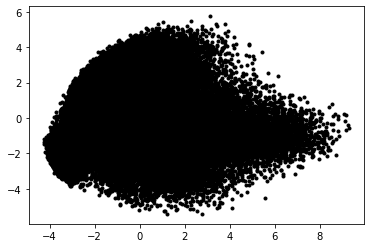

In [23]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_std)

print(X_2d)
plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.')

# DBScan

number of clusters=  64
number of noise=  1921
*****************************
Xs whith label= -1 are:
[[ 4.91269012e-16  1.64956537e-17 -2.13529556e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.23289288e-16  1.66225557e-17 -1.17843504e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.13933857e-16  2.14940520e-17 -2.19012316e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.18761091e-16  2.00236741e-17 -1.60346059e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.80632853e-16  1.89660114e-17 -1.71100071e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.38558342e-16  2.26800717e-17 -2.31564263e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Xs whith label= 0 are:
[[ 1.40473679e-16  3.90750224e-18 -5.68909570e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.77801997e-16  1.21977787e-17 -1.09338444e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.70899691e-16 -3.91464917e

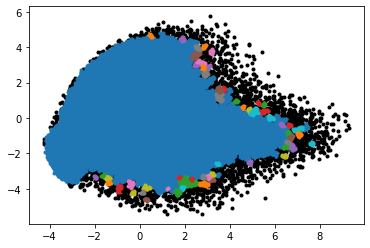

In [24]:
clu = DBSCAN(eps=0.1, min_samples=8, n_jobs=-1)
labels = clu.fit_predict(X_2d)
y = clu.labels_

print('number of clusters= ', y.max())

plt.plot(X_2d[y == -1, 0], X_2d[y == -1, 1], 'k.')
for k in range(0,y.max()+1):
    plt.plot(X_2d[y == k, 0], X_2d[y == k, 1], '.')
    
n_noise_ = list(labels).count(-1)
print('number of noise= ', n_noise_)

print('*****************************')

for i in range(-1, y.max()+1):
    X_recos = pca.inverse_transform(X_2d[y==i])
    print('Xs whith label=', i, 'are:')
    print(X_recos)

# KMeans

c:\users\raian system\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


5900.480919440431


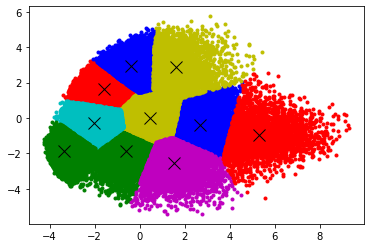

In [20]:
clu = KMeans(n_clusters=10, n_jobs=-1)
clu.fit_predict(X_2d)

centers = clu.cluster_centers_

y = clu.labels_

print(clu.inertia_/clu.n_clusters)

colors = 'rgbycmrgby'

for k in range(clu.n_clusters):
    plt.plot(X_2d[y == k, 0], X_2d[y == k, 1], colors[k]+'.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'kx', markersize=12)

Text(0, 0.5, 'inertia')

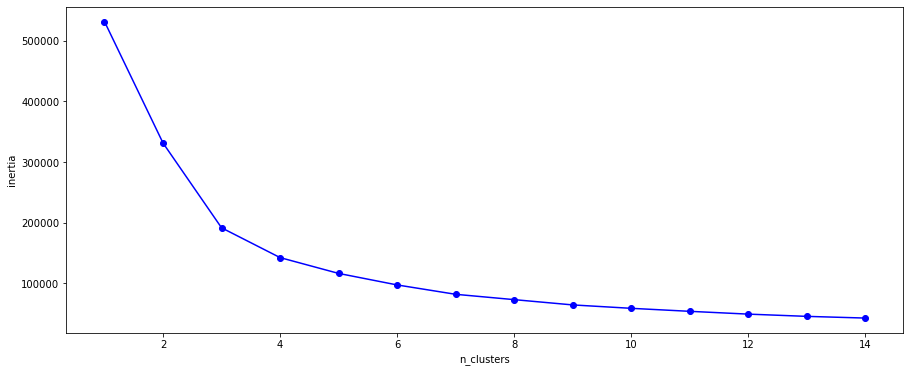

In [22]:
inertias = []

for k in range(1,15):
    clu = KMeans(n_clusters=k)
    clu.fit_predict(X_2d)
    inertias.append(clu.inertia_)

plt.figure(figsize=(15, 6))    
plt.plot(range(1,15), inertias, 'bo-')
plt.xlabel('n_clusters')
plt.ylabel('inertia')

# Accuracy

In [30]:
totalAccuracy = 0
n_clusters=10
for k in range(1, n_clusters+1):
    clusterAccuracy = max(y==k) / sum(y==k) * 100.0
    totalAccuracy += clusterAccuracy
print("KMeans clustering Accuracy " + str(totalAccuracy / 10))

KMeans clustering Accuracy 10.612789987789986
